<h1>ELG 7172B Assignment 1</h1>
<h3>Submitted by: Harshit Juneja<br>Student ID 300074170</h3>

<h4>PROBLEM 1</h4><br>
Variance of a sum<br>
a.	Show that the variance of a sum is var [X + Y ] = var[X] + var [Y ] + 2cov [X, Y ] , where cov [X, Y ] is the covariance between X and Y.<br>
b.	In Python, generate N=100 random variables X, Y from multivariate Gaussian. Assume fixed initial values of your choice for  mean[X], mean[Y], var[X], var [Y ] and cov [X, Y]. Now, compute empirical variance and covariances (from your data) and show that above formula is correct.<br>


<h4><u>Solution to Problem 1, part a</u></h4>

Mean, variance for a discrete random variable, x are defined as:
<ul>
    <li>Mean, E(x)</li> 
</ul>
\begin{align}
E[x] &= \frac{1}{n}\sum_{i=1}^{n} x_i\ \tag{1}\\
\end{align}

<ul>
    <li>Variance, var(x)</li>
</ul>
\begin{align}
var(x) &= \frac{1}{n}\sum_{i=1}^{n} (x_i - E[x])^2 \tag{2}\\
\end{align}

Covariance between two discrete random variables x and y is defined as
\begin{align}
cov(x,y) &= \frac{1}{n}\sum_{i=1}^{n} (x_i - E[x])(y_i - E[y]) \tag{3}\\
\end{align}

Let us consider the variance of the sum of x and y, by the definition of variance:
\begin{align}
var(x+y) &= \frac{1}{n}\sum_{i=1}^{n} (x_i + y_i - E[x + y])^2 \tag{4}\\
\end{align}

Since, mean can be distributed over a sum, that is:
\begin{align}
E[x+y] &= E[x] + E[y] \tag{5}\\
\end{align}

Therefore, we can rewrite equation (4) as
\begin{align}
var(x+y) &= \frac{1}{n}\sum_{i=1}^{n} (\ x_i + y_i - E[x] + E[y]\ )^2 \tag{6}\\
\end{align}
which can be rewritten as
\begin{align}
var(x+y) &= \frac{1}{n}\sum_{i=1}^{n} (\ x_i - E[x] + y_i - E[y])\ )^2 \tag{7}\\
\end{align}

Using the quadratic identity for (a+b)^2 on equation 7, we get
\begin{align}
\\var(x+y) &= \frac{1}{n}\sum_{i=1}^{n} (x_i - E[x])^2 + (y_i - E[y])^2 + 2\,(x_i - E[x])\,(y_i - E[y]) \tag{8}\\
var(x+y) &= \frac{1}{n}\sum_{i=1}^{n} (x_i - E[x])^2 + \frac{1}{n}\sum_{i=1}^{n} (y_i - E[y])^2 + 2*\frac{1}{n}\sum_{i=1}^{n} (x_i - E[x])\,(y_i - E[y]) \tag{9}\\
\end{align}

Using the definitions of variance and covariance in equations 2 and 3 in equation 9, we get
\begin{align}
\\ var(x+y) &= var(x) + var(y) + 2 * cov(x,y) \tag{10} \\
\end{align}

which is the required relation.

<br>
<h4><u>Solution to Problem 1, part b</u></h4>
<br>

We will generate a bivariate distribution, with means, variances, and the covariance of our choice to verify the formula derived in part a. We will use the method numpy.random.multivariate_normal in python's numpy library.<br>
As per the documentation, numpy.random.multivariate_normal requires mean and covariance matrices as input. For a bivariate distribution, mean and covariance matrices are:

\begin{align}
\\E=\begin{bmatrix}
    E[x]\\
    E[y]
  \end{bmatrix}\tag{11}
\end{align}
\begin{align}
\\COV=\begin{bmatrix}
    var(x) & cov(x,y)\\
    cov(x,y) & var(y)
  \end{bmatrix}\tag{12}\\
\end{align}

We will use the following values:

\begin{align}
\\E=\begin{bmatrix}
    49\\
    47
  \end{bmatrix}\tag{13}
\end{align}
\begin{align}
\\COV=\begin{bmatrix}
    100 & 88\\
    88 & 121
  \end{bmatrix}\tag{14}\\
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
mean = [49, 47]
cov = [[100,88],[88,121]] #var(x) = 10, var(y)=121
np.random.seed(7) #this is only for repeatable results when the notebook is run
x, y = np.random.multivariate_normal(mean, cov,100).T
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'bo')

Now, let's calculate the mean and variance for x and y, and also the covariance between x and y

In [2]:
E_x = np.mean(x)
E_y = np.mean(y)
Var_x = np.var(x)
Var_y = np.var(y)
Cov_xy = np.cov(x,y)
print("Mean of x = ",E_x)
print("Mean of y = ",E_y)
print("Variance of x = ",Var_x)
print("Variance of y = ",Var_y)
print("Covariance between x and y = ",Cov_xy)

Mean of x =  49.367135567299805
Mean of y =  47.22534418407318
Variance of x =  94.00514120027869
Variance of y =  115.73844581251002
Covariance between x and y =  [[ 94.95468808  82.659435  ]
 [ 82.659435   116.90752102]]


From the above we see that the values we obtain are not the same as our specified means and variances albeit quite close.<br>This is because we are sampling only 100 values from the distribution. We will get closer to the specified values as take more and more samples from the distribution.<br>Now let us calculate the mean and variance for x+y

In [3]:
z = x + y
E_z = np.mean(z)
Var_z_direct = np.var(z)
Var_z_formula = Var_x+Var_y+2*Cov_xy[0][1]
print("Mean of x+y = ",E_z)
print("Variance of x+y calculated directly = ",Var_z_direct)
print("Variance of x+y calculated using equation 10 = ",Var_z_formula)
print("Percent Error = ",np.multiply(100,(1-Var_z_direct/Var_z_formula))," %")

Mean of x+y =  96.59247975137298
Variance of x+y calculated directly =  373.4092683072802
Variance of x+y calculated using equation 10 =  375.0624570072245
Percent Error =  0.44077690770113476  %


We observe that the variance of x+y calculated directly is almost the same as the one we calculated using the equation 10, with an error of less than 0.5%. Again, this is likely due to the small number of samples and possibly difference in calculation methods in numpy's functions. Taking, a large number of samples, say, 100,000 will reduce it even further.

<hr>

<h4>PROBLEM 3</h4><br>
The following labeled data is given: x={10.9, 12.4, 13.5, 14.6, 14.8, 15.6, 16.2, 17.5, 18.3, 18.6}  and y={24.8, 30.0, 31.0, 29.3, 35.9, 36.9, 42.5, 37.9, 38.9, 40.5}.<br> 
Write python code to perform linear and ridge regression. Show R-squared error and adjusted R-squared error and explain results. You can use the code linreg_poly_ridge.py and linreg_poly_vs_degree.py (Fig 8.1 from the textbook) 

<h4><u>Solution to Problem 3</u></h4><br>
First, we focus on <b>linear regression</b>

In [4]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
#Given data
x = np.array([10.9, 12.4, 13.5, 14.6, 14.8, 15.6, 16.2, 17.5, 18.3, 18.6])
y = np.array([24.8, 30.0, 31.0, 29.3, 35.9, 36.9, 42.5, 37.9, 38.9, 40.5])
#First, we reshape the data
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)
#We split the data into two sets, train and test
x_train = x[:-5]
x_test = x[-5:]

y_train = y[:-5]
y_test = y[-5:]


With the housekeeping done, we now train our linear regression model

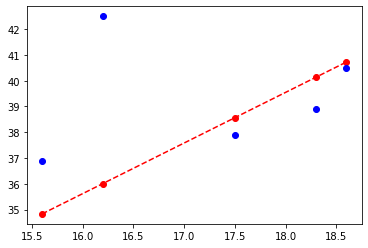

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)
# Plot predictions and actual outputs
y_predicted = regr.predict(x_test)
plt.plot(x_test, y_predicted, linestyle='--', marker='o', color='red')
plt.plot(x_test, y_test, 'bo')

Now, let us calculate the error with this linear regression model. For R-squared error, we use the r2_scorefunction built into scikit-learn. For adjusted R-squared error, we use the definition as originally given by Henri Theil:
\begin{align}
\overline{R}^2 &= 1-(1-R^2)\frac{n-1}{n-p-1}\tag{15}\\
\end{align}

Here n is number of observations in sample and p is number of independent variables in model. In our model, n=5, and p=1

In [6]:
def adj_r_squared_err(R2,n,p):
    return 1-((1-R2)*(n-1)/(n-p-1))
r_squared_error = r2_score(y_test,y_predicted)
print("The R-squared error is ",r_squared_error)
print("The Adjusted R-squared error is ",adj_r_squared_err(r_squared_error,5,1))

The R-squared error is  -1.4744478460581565
The Adjusted R-squared error is  -2.2992637947442085


We observe from both the graph, and the values of R-squared and adjusted R-squared error that our linear regression model performs poorly.<br>R-squared ideally, should be between 0 and 1, but we get a negative value!<br>This could is likely due to the fact that we only have a small set of data. Another possible reason could be that there is no linear relationship between x and y to begin with.
<br>Now, we repeat the above using <b>ridge regression</b>:

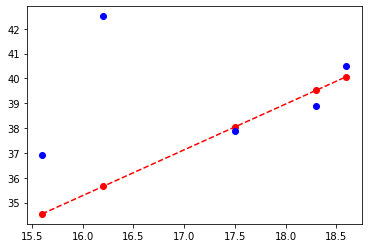

In [7]:
ridge_regr = linear_model.Ridge(alpha=0.7)
#alpha is a positive parameter for regularization strength, larger alpha => stronger regularization
#Ridge regression behaves like linear regression for low alpha
ridge_regr.fit(x_train, y_train)

# Plot predictions and actual outputs
y_predicted = ridge_regr.predict(x_test)
plt.plot(x_test, y_predicted, linestyle='--', marker='o', color='red')
plt.plot(x_test, y_test, 'bo')

We calculate the R-squared and adjusted R-squared error

In [8]:
r_squared_error = r2_score(y_test,y_predicted)
print("The R-squared error is ",r_squared_error)
print("The Adjusted R-squared error is ",adj_r_squared_err(r_squared_error,5,1))

The R-squared error is  -1.7135938685494567
The Adjusted R-squared error is  -2.618125158065942


We observe that ridge regression also performs poorly. In fact, it is worse than linear regression in our given scenario. We did vary alpha parameter to see how the model changes, but increasing the alpha parameter only seemed to worsen the situation. The value shown above(0.7) performs well for the last three samples, but poorly overall.<br>In addition to the possible explanations for linear regression performing poorly, other possibilities could be that we did not split the data into two comparable halves, the outliers are too extreme or the data does not have a linear relationship. Let us investigate.<br>
First, we plot the data as given to us and calculate the covariance

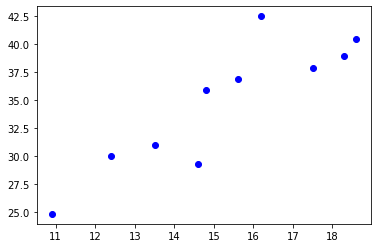

In [9]:
plt.plot(x, y, 'bo')

In [10]:
print("Covariance between given x and y =",np.cov(x,y,rowvar=False)[0][1])

Covariance between given x and y = 12.614666666666665


We observe from both the graph, and the calculated value of covariance, that x and y are indeed correlated with a positive correlation. However, there are a few outlier values, and since we split our data 50:50 without any shuffling, the outliers which are on opposite sides to the trend got moved into different sets.<br> Shuffling the data might give us better results. We will use scikit-learn to shuffle and split our data.

The R-squared error is  0.779365972116042
The Adjusted R-squared error is  0.7058212961547226


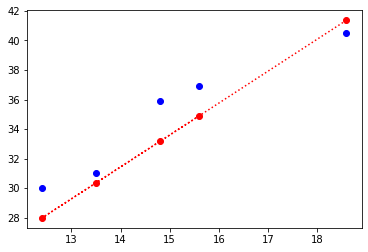

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=3)

#doing linear regression again and calculating error
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)
# Plot predictions and actual outputs
y_predicted = regr.predict(x_test)
plt.plot(x_test, y_predicted, linestyle=':', marker='o', color='red')
plt.plot(x_test, y_test, 'bo')

r_squared_error = r2_score(y_test,y_predicted)
print("The R-squared error is ",r_squared_error)
print("The Adjusted R-squared error is ",adj_r_squared_err(r_squared_error,5,1))

We see greatly improved performance this run, by shuffling our data before we split it. Let us repeat using ridge regression now.

The R-squared error is  0.8584291117159516
The Adjusted R-squared error is  0.8112388156212688


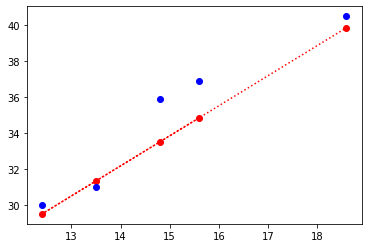

In [12]:
ridge_regr = linear_model.Ridge(alpha=10)
#alpha is a positive parameter for regularization strength, larger alpha => stronger regularization
#Ridge regression behaves like linear regression for low alpha
ridge_regr.fit(x_train, y_train)

# Plot predictions and actual outputs
y_predicted = ridge_regr.predict(x_test)
plt.plot(x_test, y_predicted, linestyle=':', marker='o', color='red')
plt.plot(x_test, y_test, 'bo')

r_squared_error = r2_score(y_test,y_predicted)
print("The R-squared error is ",r_squared_error)
print("The Adjusted R-squared error is ",adj_r_squared_err(r_squared_error,5,1))

Ridge regression also performs much better now, and as one would expect, better than linear regression. Further, by changing the alpha parameter, we can achieve even better results. We were able to achieve the best performance by setting the value of alpha to 10. Any higher, and the performance starts to degrade.<br>

The conclusion is that it is essential to randomly shuffle one's data if splitting into two halves to remove any inherent bias within the data

<h4>PROBLEM 4</h4><br>
Start with the code from Fig 6.11 and 6.12 from the text book. You can find the code here: https://github.com/probml/pyprobml/tree/master/scripts. For the parameters presented in Fig 6.12b compute standard error (see section 6.3.1.3) and predict probability of next data point to be equal one.
<br>
<h4><u>Solution to Problem 4</u></h4>
<br>

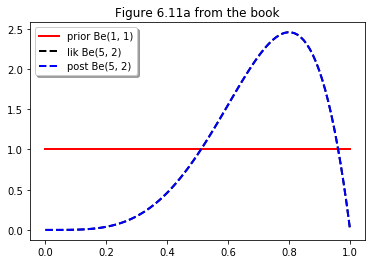

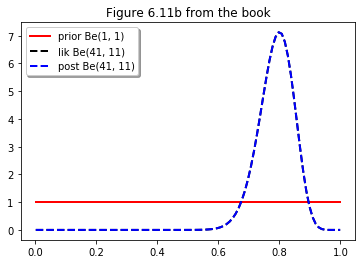

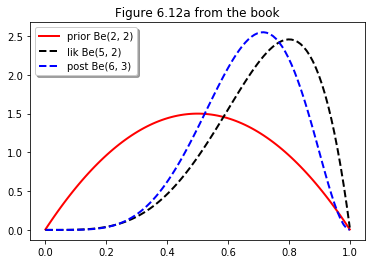

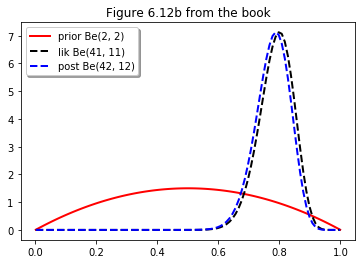

In [13]:
#the below code is adapted from beta_binom_post_plot.py from the repository mentioned in the problem statement
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

#Points where we evaluate the pdf
x = np.linspace(0.001, .999, 100)

#Given an alpha parameter, this returns a pdf function
def MakeBeta(alpha):
    def Beta(y):
        return dirichlet.pdf([y, 1 - y], alpha)
    Beta = np.vectorize(Beta)
    return Beta

#Makes strings for the legend:
def MakeLabel(Data,which):
    alpha = Data[which]
    lab = which + " Be(" + str(alpha[0]) + ", " + str(alpha[1]) + ")"
    return lab

#Forms graph give the parameters of the prior, likelihood and posterior:
def MakeGraph(Data,title):
    prior = MakeBeta(Data['prior'])(x)
    likelihood = MakeBeta(Data['lik'])(x)
    posterior = MakeBeta(Data['post'])(x)

    fig, ax = plt.subplots()
    plt.title(title)
    ax.plot(x, prior, 'r', label=MakeLabel(Data, "prior"), linewidth=2.0)
    ax.plot(x, likelihood, 'k--', label=MakeLabel(Data, "lik"), linewidth=2.0)
    ax.plot(x, posterior, 'b--', label=MakeLabel(Data, "post"), linewidth=2.0)
    ax.legend(loc='upper left', shadow=True)
    plt.show()

Data_Fig6_11a = {'prior': [1, 1],
       'lik': [5, 2],
       'post': [5, 2]}

Data_Fig6_11b = {'prior': [1, 1],
       'lik': [41, 11],
       'post': [41, 11]}

Data_Fig6_12a = {'prior': [2, 2],
       'lik': [5, 2],
       'post': [6, 3]}

Data_Fig6_12b = {'prior': [2, 2],
       'lik': [41, 11],
       'post': [42, 12]}

MakeGraph(Data_Fig6_11a,"Figure 6.11a from the book")
MakeGraph(Data_Fig6_11b,"Figure 6.11b from the book")
MakeGraph(Data_Fig6_12a,"Figure 6.12a from the book")
MakeGraph(Data_Fig6_12b,"Figure 6.12b from the book")

As per equations 6.32 to 6.35 from the book, standard error is given by
\begin{align}
\\se(\theta)=\sigma=\mathbb{V}[\theta|D]=\sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{N}}\tag{16}
\end{align}
where $\hat{\theta}$ is the MLE and
$N = N_0 + N_1$
is the total number of samples<br>
Further, as per equation 6.29 from the book, $\hat{\theta}$ is given by
\begin{align}
\\\hat{\theta}_{mle} = \frac{N_1}{N_1+N_0} = \frac{N_1}{N}\tag{17}
\end{align}
<br>
For the distribution in Fig 6.11 (a), we have $N_1 = 4$ and $N_0 = 1$, therefore,
$$\hat{\theta} = \frac{4}{4+1} = \frac{4}{5} = 0.8$$
and $$se(\theta)=\sqrt{\frac{0.8(1-0.8)}{5}}$$

In [14]:
import math
se = math.sqrt(0.8*(1-0.8)/5)
print("Standard Error = ",se)

Standard Error =  0.17888543819998315


Therefore, the standard error is $se(\theta) = 17.89\%$<br>
To predict the next value, we use equation 6.40 from the book, since we have $\alpha = \beta = 1$
$$p(x=1\mid\mathcal{D}) = \frac{N_1+1}{N_1+N_0+2}\tag{18} $$<br>
Plugging in the values, we get
$$p(x=1\mid\mathcal{D}) = \frac{4+1}{4+1+2}$$<br>
Therefore, $p(x=1\mid\mathcal{D}) = 71.43\%$<br>
Similarly, for Fig 6.11(b), we have $N_1 = 40$ and $N_0 = 10$, therefore,
$$\hat{\theta} = \frac{40}{40+10} = \frac{40}{50} = 0.8$$
and $$se(\theta)=\sqrt{\frac{0.8(1-0.8)}{50}}$$<br>

In [15]:
se = math.sqrt(0.8*(1-0.8)/50)
print("Standard Error = ",se)

Standard Error =  0.0565685424949238


the standard error in this case is $se(\theta) = 5.66\%$<br>
To predict the next value, we use equation 18 as shown above
$$p(x=1\mid\mathcal{D}) = \frac{40+1}{40+10+2}$$<br>
Therefore, $p(x=1\mid\mathcal{D}) = 78.85\%$<br>

Now moving on to Fig 6.12, here we have $\alpha = \beta = 2$.<br>
However, standard error is independent of $\alpha$ and $\beta$, therefore the values for standard error will not change.<br>
For predicting the next value though, we will have to use a more general forumla, as specified in equation 6.39 in the book
$$p(x=1\mid\mathcal{D}) = \frac{\overline{\alpha}}{\overline{\alpha}+\overline{\beta}}\tag{19} $$<br>
where $\overline{\alpha} =  N_1 + \alpha$ and $\overline{\beta} = N_0 + \beta$
The prediction for Fig 6.12(a) is<br>
$$p(x=1\mid\mathcal{D}) = \frac{4+2}{4+1+4} $$<br>
Thus, $p(x=1\mid\mathcal{D}) = 66.67\%$<br>
The prediction for Fig 6.12(v) is<br>
$$p(x=1\mid\mathcal{D}) = \frac{40+2}{40+10+4} $$<br>
Thus, $p(x=1\mid\mathcal{D}) = 77.78\%$<br>

---

<h4>PROBLEM 6</h4>
Implement the following problem in Python by simulating multivariate normal and solve analytically. To generate multivariate Gaussian random numbers please use the code below from http://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html
Let 𝑋=(𝑋1,𝑋2,𝑋3)𝑇 have a N(µ, Σ) distribution where µ=(0,0,0)T and
\begin{align}
\\\Sigma=\begin{bmatrix}
    1 & -2 & 0\\
    -2 & 5 & 0\\
    0 & 0 & 2
  \end{bmatrix}
\end{align}
Find the joint distribution of the following pairs of random variables. Are they independently distributed? Provide explanations for your answers.<br>(i) 𝑋1 and 𝑋2.
<br>(ii) 𝑋2 and 𝑋3X3.
<br>(iii) (𝑋1, 𝑋2) and 𝑋3.
<br>(iv) (𝑋1 + 𝑋2)/2 and 𝑋3.
<br>(v) 𝑋2 and −2.5𝑋1+𝑋2−𝑋3.

<br>
<h4><u>Solution to Problem 6</u></h4>
<br>
From the given information, we have<br>
\begin{align}
E[X1] = 0 \\
E[X2] = 0 \\
E[X3] = 0 \\
var(X1) = 1 \\
var(X2) = 5 \\
var(X3) = 2 \\
cov(X1,X2) = -2 \\
cov(X1,X3) = 0 \\
cov(X2,X3) = 0 \\
\end{align}

In [16]:
#As specified in the question, the solution uses code from
#https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 1000 #We will use 1000 samples

# The covariance matrix given to us:
COV = np.array([[1, -2, 0],
                [-2, 5, 0],
                [0, 0, 2]])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(COV, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(COV)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

Now that we have our correlated data, we will check if the joint distributions in (i) to (v) are independent or not.<br> For <b>(i)</b>, we plot X1 and X2 to see if they are correlated

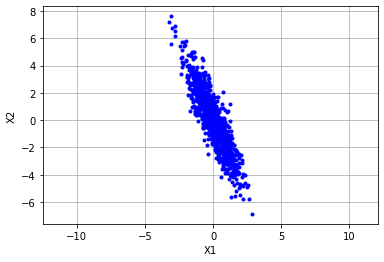

In [17]:
# Plotting the projection of X1 and X2

plot(y[0], y[1], 'b.')
ylabel('X2')
xlabel('X1')
axis('equal')
grid(True)

From the plot, we see that there is a strong negative correlation between X1 and X2. We calculate the covariance to confirm this observation

In [18]:
Cov_X1_X2 = np.cov(y[0],y[1])
print("Covariance matrix of X1 and X2", Cov_X1_X2)

Covariance matrix of X1 and X2 [[ 0.95008567 -1.8934009 ]
 [-1.8934009   4.79648869]]


We observe that we the covariance is approximately -2. This is expected based on the inputs we provided. Therefore, <b>X1 and X2 are <u>not</u> independent</b>

For <b>(ii)</b>, we plot X2 and X3 

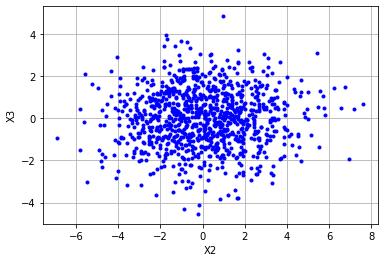

In [19]:
#plotting the projection of X2 and X3

plot(y[1], y[2], 'b.')
ylabel('X3')
xlabel('X2')
axis('equal')
grid(True)

From the scatter plot, X2 and X3 seem to have little, if any correlation. We will again calculate the covariance to confirm our observation

In [20]:
Cov_X2_X3 = np.cov(y[1],y[2])
print("Covariance matrix of X1 and X2", Cov_X2_X3)

Covariance matrix of X1 and X2 [[4.79648869 0.09451522]
 [0.09451522 1.92753156]]


We observe a non-zero but close to zero correlation. There is little, if any correlation between X2 and X3. The non-zero correlation that we see here is most likely an artefact of our small sample size of 1000. <b>Therefore, we conclude that X2 and X3 are independent</b>

For <b>(iii)</b>, we need to create a 3D plot and X1, X2 and X3

Text(0.5, 0, 'X3   ')

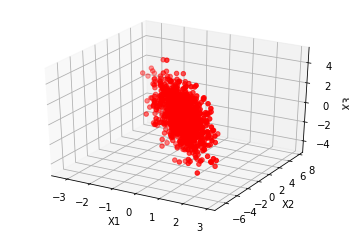

In [21]:
#we create a 3D plot of X1, X2 and X3
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y[0], y[1], y[2], c='r', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3   ')

The 3D scatter plot is not very clear, but from the shape we can infer that X1 and X2 might be correlated. For this one we shall mostly rely on the calculated covariance.

In [22]:
Cov_X1_X2_X3 = np.cov(y)
print("Covariance matrix of X1, X2 and X3", Cov_X1_X2_X3)

Covariance matrix of X1, X2 and X3 [[ 0.95008567 -1.8934009  -0.06982352]
 [-1.8934009   4.79648869  0.09451522]
 [-0.06982352  0.09451522  1.92753156]]


Here, similar to parts (i) and (ii), we see that we get values close to the covariance we gave as an input, but not quite the same. Further, the error seems to be larger than we observed in the previous parts. This is likely due to the cascading effects of which we did not see earlier as we restricted ourselves to only two variables. The conclusion here is that X1 and X2 have a strong negative correlation, while (X1,X3) and (X2,X3) only have a weak correlation, if any at all.

Moving on to part <b>(iv)</b>, we plot (X1 + X2)/2 and X3

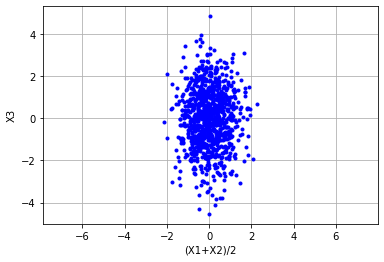

In [23]:
#plotting the projection of (X1+X2)/2 and X3

z = (y[0]+y[1])/2

plot(z, y[2], 'b.')
ylabel('X3')
xlabel('(X1+X2)/2')
axis('equal')
grid(True)

From the  plot, (X1+X2)/2 and X3 seem to have little, if any correlation. We will again calculate the covariance to confirm our observation

In [24]:
Cov_z_X3 = np.cov(z,y[2])
print("Covariance matrix of (X1+X2) and X3", Cov_z_X3)

Covariance matrix of (X1+X2) and X3 [[0.48994314 0.01234585]
 [0.01234585 1.92753156]]


We observe a non-zero correlation close to zero. There is little, if any correlation between (X1+X2)/2 and X3. This is expected as neither X1 nor X2 were individually corelated to X3. <b>Therefore, we conclude that (X1+X2)/2 and X3 are independent</b>

For the final part, that is <b>(v)</b>, we have X2 and −2.5X1+X2−X3. Let us again plot and check

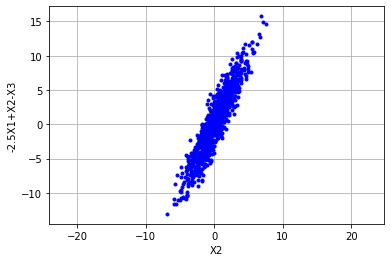

In [25]:
#plotting the projection of X2 and -2.5X1+X2-X3

z2 = -2.5*y[0]+y[1]-y[2]

plot(y[1], z2, 'b.')
ylabel('-2.5X1+X2-X3')
xlabel('X2')
axis('equal')
grid(True)

From the graph, we observe that there is a strong positive correlation between X2 and -2.5X1+X2-X3. Intuitively, this makes sense as we have reversed the sign of X1 in the second term and X1 and X3 originally had a negative correlation. Let us again calculate the covariance to confirm

In [26]:
Cov_X2_z2 = np.cov(y[1],z2)
print("Covariance matrix of X2 and -2.5X1+X2-X3", Cov_X2_z2)

Covariance matrix of X2 and -2.5X1+X2-X3 [[ 4.79648869  9.43547571]
 [ 9.43547571 21.59091216]]


Our observation from the graph is confirmed; there is a strong positive correlation between X2 and -2.5X1+X2-X3. <b>Therefore, X2 and -2.5X1+X2-X3 are <u>not</u> independent</b>

---

<h3>References:</h3><br>
[1] A. Downey, Think stats, Second edition. Sebastopol, CA: O’Reilly Media, 2014 [Online]. Available: https://greenteapress.com/wp/think-stats-2e/<br>
[2] “Overview — NumPy v1.17 Manual.”  [Online]. Available: https://docs.scipy.org/doc/numpy/. [Accessed: 07-Oct-2019]<br>
[3] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.<br>
[4] “beta_binom_post_plot.py,” GitHub.  [Online]. Available: https://github.com/probml/pyprobml. [Accessed: 07-Oct-2019]<br>
[5] K. P. Murphy, Machine learning: a probabilistic perspective 2nd ed. Cambridge, MA: MIT Press, 2020.<br>
[6] “Correlated Random Samples — SciPy Cookbook documentation.”  [Online]. Available: https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html. [Accessed: 07-Oct-2019]